In [19]:
%matplotlib inline
from sympy import *
init_printing(use_latex=True)
import mpmath

In [43]:
P,do,dc,q,mdot,Id,mu,mu0,eps,a,M,Lo,pi = symbols('P,d_o,d_c,q,\dot{m},I_d,\mu,\mu0,\epsilon,a,M,L_o,\pi',real=True,positive=True)

In [21]:
a1,b1,c1,d1,e1,f1 = symbols('a1,b1,c1,d1,e1,f1',real=True)

In [22]:
PI1 = (P/(mu0*Id**2/(pi**2*do**2)))
PI2 = (do/dc)
PI3 = (do/Lo)
PI4 = ((mdot*q/(M*Id))**2 * (M*do/(mu0*q**2)))
PI5 = (mdot*a/(mu0*Id**2)) * 4*pi
PI6 = (q*eps/(do**2*Lo))*1/(mu0*Id**2/do**2) * (Lo/do) * 4*pi
PI7 = (mdot/(pi*(do/2)**2)*do/mu)





In [23]:
#e1 = 1.44712412817975577539
#e2 = -0.11091843726897565592
#e3 = -1.02474104747362382284
#e4 = 2.25572338431441021811
#e5 = -0.35553883591005885911
#e6 = 0.22139953816031118783

### LEAST SQUARES METHOD
e1 = 0.79190862621816449
e2 = 0.23399892594775878
e3 = -0.22954590062564012
e4 = 0.73078608503690878
e5 = 0.29823417580302758
e6= 0.41202315150140373
Cfit_l = 13255363.148496266
  

prod = (mu0*Id**2.0/(pi**2.0*do**2.0))*PI2**e1*PI3**e2*PI4**e3*PI5**e4*PI6**e5*PI7**e6

In [24]:
import cathode.constants as cs
import cathode.models.flow as cmf
import numpy as np

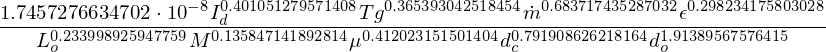

In [29]:
gam,kb,Tg,Mamu,C_fit = symbols('\gamma,k_B,Tg,M_a,C_f',real=True,positive=True)
prod_noa = C_fit*prod.subs(a,sqrt(gam*kb/M*Tg))
#prod_noa = C_fit*prod.subs(a,sqrt(gam*cs.gas_constant*1e3/(M/cs.atomic_mass)*Tg))
prod_noa.subs([(mu0,4*np.pi*10**(-7)),(q,cs.e),(pi,np.pi),(gam,5/3),(kb,cs.Boltzmann),(C_fit,Cfit_l)])

In [33]:
prod_SI = prod_noa.subs([(mu0,4*np.pi*10**(-7)),(q,cs.e),(pi,np.pi),(gam,5/3),(kb,cs.Boltzmann),(C_fit,Cfit_l)])

In [26]:
Locm,docm,dccm,mdsccm = symbols('L_{ocm},d_{ocm},d_{ccm},\dot{m}_s')
prod_Torr = prod_SI.subs([(mdot,mdsccm*0.07174496*M/cs.e),(M,Mamu*cs.atomic_mass),(do,docm*1e-2),(dc,dccm*1e-2),(Lo,Locm*1e-2)])*760/101325

In [12]:
prod_Torr.subs([(Id,10),(Tg,4443.663),(mdsccm,10),(Locm,0.074),(Mamu,131.293),(eps,12.1298),(mu,1.6538e-4),(dccm,0.38),(docm,0.104)])

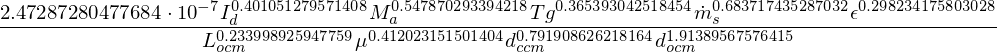

In [34]:
prod_Torr = prod_SI.subs([(mdot,mdsccm*0.07174496*M/cs.e),(M,Mamu*cs.atomic_mass),(do,docm*1e-2),(dc,dccm*1e-2),(Lo,Locm*1e-2)])*760/101325
prod_Torr

In [35]:
mu_n = cmf.viscosity(3000,'Xe',units='Pa-s')
prod_Torr.subs([(Id,22),(Tg,3000),(mdsccm,5.5),(Locm,0.074),(Mamu,131.293),(eps,12.128),(mu,mu_n),(dccm,1.27),(docm,0.25)])

In [15]:
mu_n

In [36]:
mdot_sccm = 5.5
M_n = 131.293*cs.atomic_mass
mdot_n = mdot_sccm *M_n/cs.e * cs.sccm2eqA
prod_SI.subs([(Id,22),(Tg,3000),(mdot,mdot_n),(Lo,0.74e-3),(M,M_n),(eps,12.128),(mu,mu_n),(dc,1.27e-2),(do,2.5e-3)])*760/101325

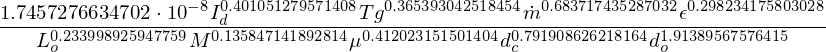

In [37]:
prod_SI

In [51]:
mu_n = cmf.viscosity(4000,'Xe',units='Pa-s')
Idvec = np.arange(5.0,31.0,1)
resvec = np.zeros_like(Idvec)
for idx,Idv in enumerate(Idvec):
    resvec[idx] = prod_Torr.subs([(Id,Idv),(Tg,4000),(mdsccm,5.5),(Locm,0.074),(Mamu,131.293),(eps,12.128),(mu,mu_n),(dccm,1.27),(docm,0.25)])
    print(Idv,resvec[idx])

5.0 0.766385220512
6.0 0.824523163677
7.0 0.877105746998
8.0 0.925357823644
9.0 0.970117827961
10.0 1.01198851996
11.0 1.05141985803
12.0 1.08875791671
13.0 1.12427541305
14.0 1.15819162869
15.0 1.19068589962
16.0 1.2219070375
17.0 1.25198008493
18.0 1.28101127034
19.0 1.30909171477
20.0 1.33630025359
21.0 1.36270561784
22.0 1.38836814372
23.0 1.41334112906
24.0 1.43767192167
25.0 1.46140280149
26.0 1.48457170209
27.0 1.50721280605
28.0 1.52935703974
29.0 1.55103248779
30.0 1.57226474237


In [47]:
mu_n = cmf.viscosity(3000,'Xe',units='Pa-s')
mdotvec = np.arange(4.0,12.0,1)
resvec = np.zeros_like(mdotvec)
for idx,mdot in enumerate(mdotvec):
    resvec[idx] = prod_Torr.subs([(Id,22),(Tg,3000),(mdsccm,mdot),(Locm,0.074),(Mamu,131.293),(eps,12.128),(mu,mu_n),(dccm,1.27),(docm,0.25)])
    print(mdot,resvec[idx])

4.0 1.08513207194
5.0 1.26398425793
6.0 1.43178979804
7.0 1.59093322202
8.0 1.74301873892
9.0 1.88919125956
10.0 2.03030424061
11.0 2.16701552268


In [49]:
mu_n = cmf.viscosity(4000,'Xe',units='Pa-s')
mdotvec = np.arange(4.0,12.0,1)
resvec = np.zeros_like(mdotvec)
for idx,mdot in enumerate(mdotvec):
    resvec[idx] = prod_Torr.subs([(Id,22),(Tg,4000),(mdsccm,mdot),(Locm,0.074),(Mamu,131.293),(eps,12.128),(mu,mu_n),(dccm,1.27),(docm,0.25)])
    print(mdot,resvec[idx])

4.0 1.11672097671
5.0 1.30077966689
6.0 1.47347013609
7.0 1.6372463293
8.0 1.79375915513
9.0 1.9441868535
10.0 2.08940772578
11.0 2.23009876274
